# *Import Libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# *Look over the dataset*

In [3]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# *Statistics of the numerical columns*

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# *Checking Null values*

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# *Dependent & Independent features*

In [8]:
X = df.drop(['Exited'],axis=1)
y= df['Exited']

# *Train - Test - Split*

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,shuffle=True, random_state = 42)

In [58]:
# check the shape of X_train and X_test
print('train shape = ',X_train.shape)
print('test shape = ',X_test.shape)

train shape =  (6700, 13)
test shape =  (3300, 13)


In [59]:
X_train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [60]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,8372,15661034,Ngozichukwuka,813,Germany,Female,29,5,106059.40,1,0,0,187976.88
5027,5028,15807989,Wall,681,Germany,Male,37,8,73179.34,2,1,1,25292.53
9234,9235,15766044,Cameron,642,Germany,Male,49,4,120688.61,1,1,0,24770.22
3944,3945,15794792,Golubev,612,France,Female,31,8,117989.76,1,1,1,54129.86
6862,6863,15736287,Piccio,586,France,Male,33,9,0.00,1,1,0,6975.02


In [65]:
X_train = X_train.drop(['Surname'], axis=1)

In [66]:
X_train = X_train.drop(['RowNumber'], axis=1)

# *Label Encoding of categorical features*

In [61]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [63]:
X_train = X_train.drop(['CustomerId'], axis=1)

In [68]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,409,1,0,11,5,1381,0,0,0,6264
5027,277,1,1,19,8,251,1,1,1,815
9234,238,1,1,31,4,2160,0,1,0,800
3944,208,0,0,13,8,2018,0,1,1,1754
6862,182,0,1,15,9,0,0,1,0,243


# *Standardize the columns*

In [70]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['CreditScore', 'EstimatedSalary','Balance']
scaler = StandardScaler()
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,1.679279,1,0,11,5,0.022678,0,0,0,1.506884
5027,0.302994,1,1,19,8,-0.775615,1,1,1,-1.310413
9234,-0.103635,1,1,31,4,0.573005,0,1,0,-1.318168
3944,-0.416427,0,0,13,8,0.472688,0,1,1,-0.824922
6862,-0.687514,0,1,15,9,-0.952935,0,1,0,-1.606154


# *Drop the columns*

In [71]:
X_test = X_test.drop(['Surname'], axis=1)
X_test = X_test.drop(['RowNumber'], axis=1)
X_test = X_test.drop(['CustomerId'], axis=1)

In [72]:
X_test[columns_to_standardize] = scaler.fit_transform(X_test[columns_to_standardize])
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.537140,1,1,14,3,-0.357385,1,0,0,-0.998816
4684,-0.257861,0,1,25,1,-0.969922,1,1,1,0.874948
1731,-0.485422,2,0,26,4,-0.969922,1,1,0,-0.702793
4742,-1.468069,1,1,41,8,0.522697,1,1,1,1.258099
4521,-0.909512,2,0,9,7,0.769120,0,1,1,0.294449


# *Importing ML models*

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

# *Function of different model fit, predict & checking accuracy*

In [74]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

# *Logistic Regression*

In [75]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.81727 



# *Ada Boost Classifier*

In [92]:
ada = AdaBoostClassifier(n_estimators=1000,random_state=0,learning_rate = 0.1)
score(ada,"Ada Boost Classifier")

Accuracy for Ada Boost Classifier : 0.8603 



# *Random Forest Classifier*

In [87]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0,criterion='entropy',max_features='sqrt',min_samples_split=5
)
score(rf,"Random Forest Classification")

Accuracy for Random Forest Classification : 0.86909 



# *Gaussian Naive Bayes*

In [46]:
gnb = GaussianNB(var_smoothing=1e-8)
score(gnb,"Gaussian Naive Bias")

Accuracy for Gaussian Naive Bias : 0.83485 



# *K Neighbors Classifier*

In [104]:
knnc = KNeighborsClassifier(
    n_neighbors=15,
    p=2,
    metric='minkowski'
)
score(knnc,"KNeighborsClassifier")

Accuracy for KNeighborsClassifier : 0.82364 



# *Decision Tree Classifier*

In [107]:
dtc = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=0,
    max_features='log2'
    
)
score(dtc,"DecisionTreeClassifier")

Accuracy for DecisionTreeClassifier : 0.84879 



# *XGB Classifier*

In [114]:
xgbc = XGBClassifier(n_estimators=1000,learning_rate=0.01,gamma=0.1,random_state=0)
score(xgbc,"XGBClassifier")

Accuracy for XGBClassifier : 0.86848 



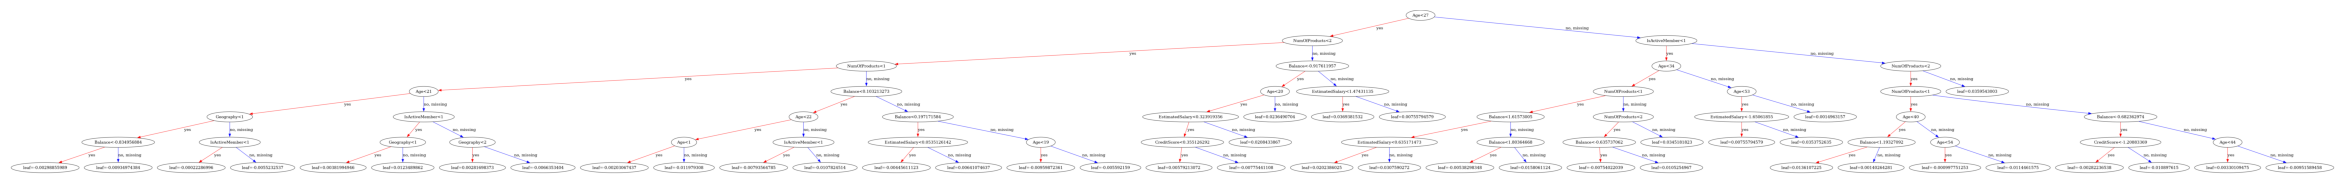

In [115]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgbc, ax=ax)
plt.show()

# *XGBRF Classifier*

In [117]:
xgbrf = XGBRFClassifier(n_estimators=1000,learning_rate=1.0, random_state=0)
score(xgbrf,"XGBRFClassifier")

Accuracy for XGBRFClassifier : 0.86485 



# *Confusion Matrix*

In [118]:
for i in [lg,ada,rf,gnb,knnc,dtc,xgbc,xgbrf]:
  i.fit(X_train, y_train)
  preds = i.predict(X_test)
  print("model : ",i)
  print(confusion_matrix(y_test, preds))
  print("  ")

model :  LogisticRegression(multi_class='multinomial', random_state=0)
[[2588   69]
 [ 534  109]]
  
model :  AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)
[[2547  110]
 [ 351  292]]
  
model :  RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=1000, random_state=0)
[[2592   65]
 [ 367  276]]
  
model :  GaussianNB(var_smoothing=1e-08)
[[2604   53]
 [ 487  156]]
  
model :  KNeighborsClassifier(n_neighbors=15)
[[2538  119]
 [ 463  180]]
  
model :  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       random_state=0)
[[2530  127]
 [ 372  271]]
  
model :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=

# *Feature Importance*

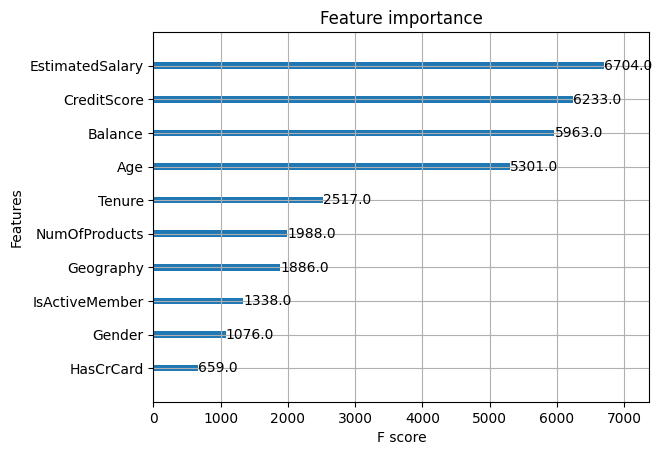

In [119]:
from xgboost import plot_importance
plot_importance(xgbc)
plt.show()

# *Classification Report*

In [120]:
from sklearn.metrics import classification_report
xgb_c = XGBClassifier(n_estimators=1000,learning_rate=0.1)
xgb_c.fit(X_train, y_train)
y_pred = xgb_c.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2657
           1       0.67      0.49      0.57       643

    accuracy                           0.85      3300
   macro avg       0.78      0.72      0.74      3300
weighted avg       0.84      0.85      0.84      3300

